## Import Data into Python Using Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

%matplotlib inline

calldata = pd.read_csv('party_in_nyc.csv')
#calldata.head()

## Create Columns for Month, Day, and Time 
### Time is a tuple of (Hour, Minute, Second)

In [3]:
# Create time column

def getTime(created):
    time = (created.split()[-1])
    time = time.split(sep=':')
    time = tuple(time)
    return time

def getMonth(created):
    month = (created.split()[0])
    month = month.split(sep = '-')
    month = int(month[1])
    return month

def getDay(created):
    day = (created.split()[0])
    day = day.split(sep = '-')
    day = int(day[-1])
    return day

created_series = calldata.iloc[:,0]
month_series = created_series.apply(getMonth)
day_series = created_series.apply(getDay)
time_series = created_series.apply(getTime)

calldata = calldata.assign(Month=month_series.values)
calldata = calldata.assign(Day=day_series.values)
calldata = calldata.assign(Time=time_series.values)

#calldata.head()

In [4]:
# add weekday column
def getYear(created):
    year = (created.split()[0])
    year = year.split(sep = '-')
    year = int(year[0])
    return year

def getWeekday(created):
    day = getDay(created)
    month = getMonth(created)
    year = getYear(created)
    newDate = date(int(year), int(month), int(day))
    newDate = newDate.weekday()
    if newDate == 0:
        newDate = 'Monday'
    elif newDate == 1:
        newDate = 'Tuesday'
    elif newDate == 2:
        newDate = 'Wednesday'
    elif newDate == 3:
        newDate = 'Thursday'
    elif newDate == 4:
        newDate = 'Friday'
    elif newDate == 5:
        newDate = 'Saturday'
    elif newDate == 6:
        newDate = 'Sunday'
    else:
        newDate = 'Wrong'
    return newDate

# returns weekday as int, starting with 0 as monday
def getWeekdayInt(created):
    day = getDay(created)
    month = getMonth(created)
    year = getYear(created)
    newDate = date(int(year), int(month), int(day))
    newDate = newDate.weekday()
    return newDate


In [5]:
created_series = calldata.iloc[:,0]
weekday_series = created_series.apply(getWeekday)
weekday_int_series = created_series.apply(getWeekdayInt)

calldata = calldata.assign(Weekday = weekday_series.values)
calldata = calldata.assign(WeekdayInt = weekday_int_series.values)
#calldata.head()

In [6]:
#Bailey Stuff

#Graph the density of calls to location type to hours in the day


#created_series = calldata.iloc[:,0]
#month_series = created_series.apply(getMonth)
#day_series = created_series.apply(getDay)
#time_series = created_series.apply(getTime)

#calldata = calldata.assign(Month=month_series.values)
#calldata = calldata.assign(Day=day_series.values)
#calldata = calldata.assign(Time=time_series.values)
#def getDay(created):
 #   day = (created.split()[0])
 #   day = day.split(sep = '-')
 #   day = day[-1]
 #   return day

def getHour(time):
    hour = int(time[0])
    return hour

hour_series = time_series.apply(getHour)

calldata = calldata.assign(Hour=hour_series)
calldata.head()

#make histogram for all location types vs hours, each location type vs hours. City vs. hour, borough vs hour
store = calldata.loc[calldata['Location Type'] == 'Store/Commercial']
house = calldata.loc[calldata['Location Type'] == 'Residential Building/House']
club = calldata.loc[calldata['Location Type'] == 'Club/Bar/Restaurant']
street = calldata.loc[calldata['Location Type'] == 'Street/Sidewalk']
park = calldata.loc[calldata['Location Type'] == 'Park/Playground']
church = calldata.loc[calldata['Location Type'] == 'House of Worship']

man = calldata.loc[calldata['Borough'] == 'MANHATTAN']
bro = calldata.loc[calldata['Borough'] == 'BROOKLYN']
brx = calldata.loc[calldata['Borough'] == 'BRONX']
que = calldata.loc[calldata['Borough'] == 'QUEENS']
sta = calldata.loc[calldata['Borough'] == 'STATEN ISLAND']
uns = calldata.loc[calldata['Borough'] == 'Unspecified']

In [7]:
#Locations of parties over the year( by month, by day)

def getYearDay(date):
    day = getDay(date)
    month = getMonth(date)
    if month == 1:
        yearday = day
    elif month == 2:
        yearday = 31 + day
    elif month == 3:
        yearday = 60 + day
    elif month == 4:
        yearday = 91 + day
    elif month == 5:
        yearday = 121 + day
    elif month == 6:
        yearday = 152 + day
    elif month == 7:
        yearday = 182 + day
    elif month == 8:
        yearday = 213 + day
    elif month == 9:
        yearday = 244 + day
    elif month == 10:
        yearday = 274 + day
    elif month == 11:
        yearday = 305 + day
    elif month == 12:
        yearday = 335 + day
    return yearday

created_series = calldata.iloc[:,0]
yearday_series = created_series.apply(getYearDay)
calldata = calldata.assign(YearDay=yearday_series.values)

In [8]:
calldata.info()
calldata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 15 columns):
Created Date     225414 non-null object
Closed Date      224619 non-null object
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
Month            225414 non-null int64
Day              225414 non-null int64
Time             225414 non-null object
Weekday          225414 non-null object
WeekdayInt       225414 non-null int64
Hour             225414 non-null int64
YearDay          225414 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 25.8+ MB


,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,Month,Day,Time,Weekday,WeekdayInt,Hour,YearDay
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,12,31,"(00, 01, 15)",Thursday,3,0,366
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,12,31,"(00, 02, 48)",Thursday,3,0,366
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371,12,31,"(00, 03, 25)",Thursday,3,0,366
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668,12,31,"(00, 03, 26)",Thursday,3,0,366
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516,12,31,"(00, 05, 10)",Thursday,3,0,366


## Plot all calls by Longitude/Latitude

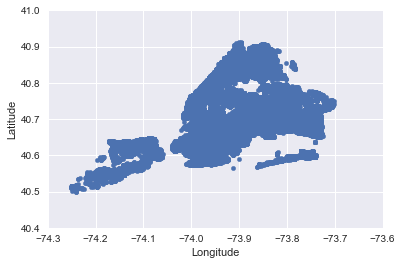

In [9]:
calldata.plot(kind = 'scatter',x='Longitude',y='Latitude',xlim = (-74.3,-73.6),ylim = (40.4,41))

## Plot only store/commercial calls by Longitude/Latitude

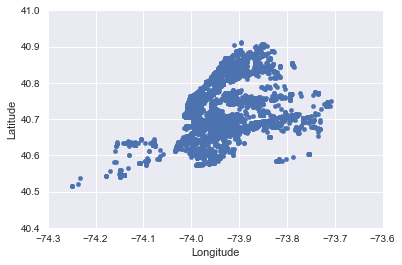

In [10]:
howdata = calldata.loc[calldata['Location Type'] == 'Store/Commercial']
howdata.plot(kind = 'scatter',x='Longitude',y='Latitude',xlim = (-74.3,-73.6),ylim = (40.4,41))

## Hexbin and Density plots of all calls by Longitude/Latitude

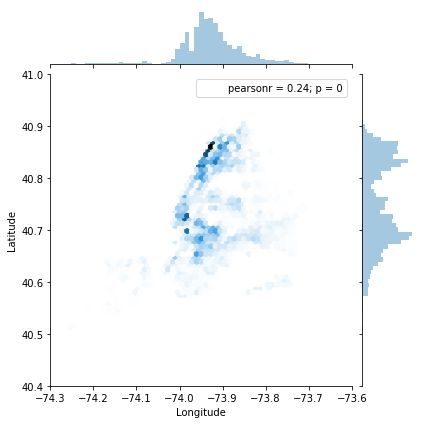

In [30]:
sns.jointplot(x="Longitude", y="Latitude", data=calldata, kind="hex",xlim = (-74.3,-73.6),ylim = (40.4,41))

In [31]:
#sns.jointplot(x="Longitude", y="Latitude", data=calldata, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

(array([ 28605.,  20054.,  12310.,   7015.,   3728.,   2134.,   1415.,
          1275.,   1443.,   1898.,   2306.,   2857.,   3312.,   3691.,
          4265.,   4614.,   5263.,   6361.,   7976.,  10733.,  14027.,
         18899.,  28335.,  32898.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

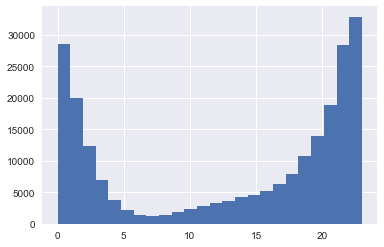

In [11]:
plt.hist(calldata['Hour'],24)

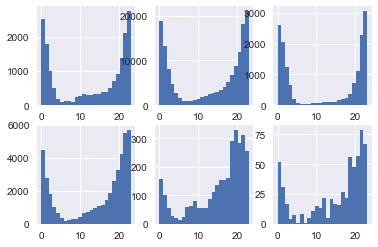

In [12]:
#Locations by hour

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(store['Hour'],24)
#ax1.title('Store/Commercial')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(house['Hour'],24)
#ax2.title('Residential Building/House')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(club['Hour'],24)
#ax3.title('Club/Bar/Restaurant')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(street['Hour'],24)
#ax4.title('Street/Sidewalk')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(park['Hour'],24)
#ax5.title('Park/Playground')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(church['Hour'],24)
#ax6.title('House of Worship')

plt.show()

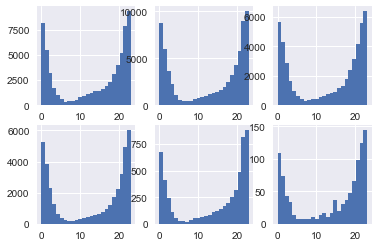

In [13]:
#Borough by hour

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(man['Hour'],24)
#ax1.title('Store/Commercial')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(bro['Hour'],24)
#ax2.title('Residential Building/House')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(brx['Hour'],24)
#ax3.title('Club/Bar/Restaurant')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(que['Hour'],24)
#ax4.title('Street/Sidewalk')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(sta['Hour'],24)
#ax5.title('Park/Playground')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(uns['Hour'],24)
#ax6.title('House of Worship')

plt.show()

(array([ 20579.,  16244.,  17049.,  19257.,  30130.,  61161.,  60994.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

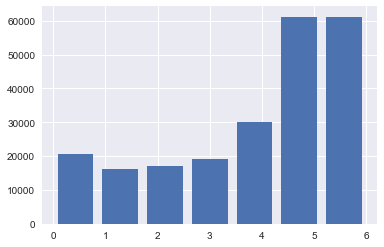

In [14]:
plt.hist(calldata['WeekdayInt'],bins = 7, rwidth = 0.8)

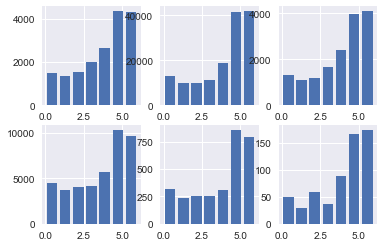

In [15]:
#Locations by weekday

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(store['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax1.title('Store/Commercial')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(house['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax2.title('Residential Building/House')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(club['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax3.title('Club/Bar/Restaurant')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(street['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax4.title('Street/Sidewalk')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(park['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax5.title('Park/Playground')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(church['WeekdayInt'], bins = 7, rwidth = 0.8)
#ax6.title('House of Worship')

plt.show()

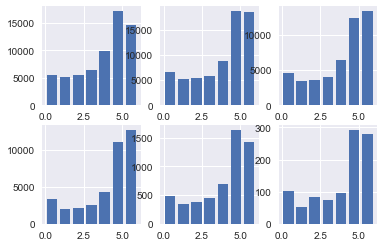

In [16]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(man['WeekdayInt'], bins = 7, rwidth = 0.8)
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(bro['WeekdayInt'], bins = 7, rwidth = 0.8)
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(brx['WeekdayInt'], bins = 7, rwidth = 0.8)
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(que['WeekdayInt'], bins = 7, rwidth = 0.8)
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(sta['WeekdayInt'], bins = 7, rwidth = 0.8)
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(uns['WeekdayInt'], bins = 7, rwidth = 0.8)

plt.show()

(array([ 1189.,   593.,   667.,   218.,   184.,   204.,   213.,   340.,
          712.,   612.,   195.,   186.,   165.,   220.,   362.,   709.,
          723.,   252.,   163.,   193.,   226.,   341.,   435.,   301.,
          218.,   182.,   262.,   239.,   398.,   724.,   745.,   239.,
          215.,   207.,   280.,   378.,   684.,   810.,   284.,   160.,
          214.,   141.,   398.,   587.,   653.,   318.,   205.,   259.,
          240.,   376.,   727.,   778.,   247.,   178.,   180.,   225.,
          337.,   722.,   728.,   207.,   201.,   189.,   202.,   335.,
          743.,   752.,   269.,   246.,   421.,   485.,   537.,   958.,
          878.,   218.,   235.,   281.,   336.,   392.,   880.,   751.,
          215.,   246.,   419.,   386.,   567.,   901.,   875.,   220.,
          212.,   229.,   301.,   634.,  1028.,   789.,   214.,   233.,
          251.,   298.,   436.,   815.,   757.,   266.,   263.,   267.,
          341.,   557.,  1046.,  1335.,   454.,   428.,   313., 

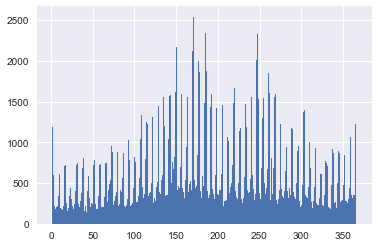

In [17]:
plt.hist(calldata['YearDay'],366)

(array([  593.,   712.,   709.,   435.,   724.,   684.,   587.,   727.,
          722.,   743.,   958.,   880.,   901.,  1028.,   815.,  1046.,
         1246.,  1310.,  1377.,  1562.,  1574.,  1616.,  1594.,  1779.,
         2120.,  1997.,  1483.,  1436.,  1427.,  1255.,  1067.,  1477.,
         1139.,  1473.,  1552.,  2011.,  1297.,  1849.,  1552.,  1223.,
         1234.,  1181.,   899.,  1372.,  1007.,   927.,  1036.,   750.,
          917.,   896.,   843.,   736.,   683.]),
 array([   2.        ,    8.86792453,   15.73584906,   22.60377358,
          29.47169811,   36.33962264,   43.20754717,   50.0754717 ,
          56.94339623,   63.81132075,   70.67924528,   77.54716981,
          84.41509434,   91.28301887,   98.1509434 ,  105.01886792,
         111.88679245,  118.75471698,  125.62264151,  132.49056604,
         139.35849057,  146.22641509,  153.09433962,  159.96226415,
         166.83018868,  173.69811321,  180.56603774,  187.43396226,
         194.30188679,  201.16981132,  208

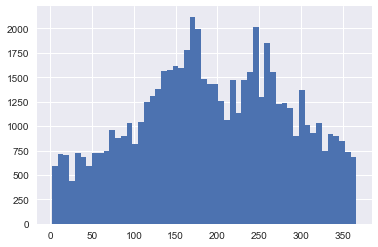

In [18]:
sat = calldata.loc[calldata['Weekday'] == 'Saturday']
plt.hist(sat['YearDay'],53)

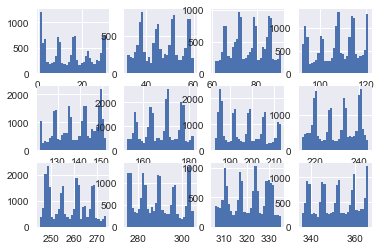

In [19]:
#By month

jan = calldata.loc[calldata['Month'] == 1]
feb = calldata.loc[calldata['Month'] == 2]
mar = calldata.loc[calldata['Month'] == 3]
apr = calldata.loc[calldata['Month'] == 4]
may = calldata.loc[calldata['Month'] == 5]
jun = calldata.loc[calldata['Month'] == 6]
jul = calldata.loc[calldata['Month'] == 7]
aug = calldata.loc[calldata['Month'] == 8]
sep = calldata.loc[calldata['Month'] == 9]
oct = calldata.loc[calldata['Month'] == 10]
nov = calldata.loc[calldata['Month'] == 11]
dec = calldata.loc[calldata['Month'] == 12]

fig = plt.figure()

ax1 = fig.add_subplot(3, 4, 1)
ax1.hist(jan['YearDay'],31)

ax2 = fig.add_subplot(3, 4, 2)
ax2.hist(feb['YearDay'],29)

ax3 = fig.add_subplot(3, 4, 3)
ax3.hist(mar['YearDay'],31)

ax4 = fig.add_subplot(3, 4, 4)
ax4.hist(apr['YearDay'],30)

ax5 = fig.add_subplot(3, 4, 5)
ax5.hist(may['YearDay'],31)

ax6 = fig.add_subplot(3, 4, 6)
ax6.hist(jun['YearDay'],30)

ax7 = fig.add_subplot(3, 4, 7)
ax7.hist(jul['YearDay'],31)

ax8 = fig.add_subplot(3, 4, 8)
ax8.hist(aug['YearDay'],31)

ax9 = fig.add_subplot(3, 4, 9)
ax9.hist(sep['YearDay'],30)

ax10 = fig.add_subplot(3, 4, 10)
ax10.hist(oct['YearDay'],31)

ax11 = fig.add_subplot(3, 4, 11)
ax11.hist(nov['YearDay'],30)

ax12 = fig.add_subplot(3, 4, 12)
ax12.hist(dec['YearDay'],31)

plt.show()

In [20]:
# try to identify specific locations by latitude/longitude
# see if the first location is repeated anywhere over the year
lat = calldata.iloc[1].Latitude
long = calldata.iloc[1].Longitude
lat0 = calldata.loc[calldata['Latitude'] == lat]
long0 = calldata.loc[calldata['Longitude'] == long]
#print(lat0.head())
#print(long0.head())
#print(lat)
#print(long)

# est. lat/long for 1: 40.8593241939, -73.9312373366

# true lat/long for 1: 40.85932419390543, -73.93123733660876
# true lat/long for 97: 40.85932419390543, -73.93123733660876
# this seems to be a fail, using google maps as lookup implies that there's just not the accuracy needed

In [21]:
# specific heatmaps
# this was already done as club above, whoops -- using club from now on
bars = calldata.loc[calldata['Location Type'] == 'Club/Bar/Restaurant']
bars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15766 entries, 13 to 225402
Data columns (total 15 columns):
Created Date     15766 non-null object
Closed Date      15740 non-null object
Location Type    15766 non-null object
Incident Zip     15747 non-null float64
City             15747 non-null object
Borough          15766 non-null object
Latitude         15731 non-null float64
Longitude        15731 non-null float64
Month            15766 non-null int64
Day              15766 non-null int64
Time             15766 non-null object
Weekday          15766 non-null object
WeekdayInt       15766 non-null int64
Hour             15766 non-null int64
YearDay          15766 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 1.9+ MB


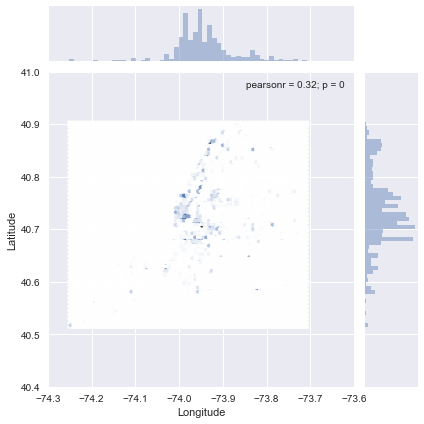

In [22]:
# hexbin and density plots of all cars about bars/restaurants by long/lat
sns.jointplot(x="Longitude", y="Latitude", data=bars, kind="hex",xlim = (-74.3,-73.6),ylim = (40.4,41))

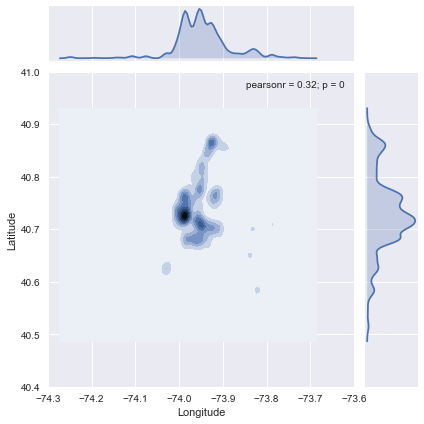

In [24]:
sns.jointplot(x="Longitude", y="Latitude", data=club, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

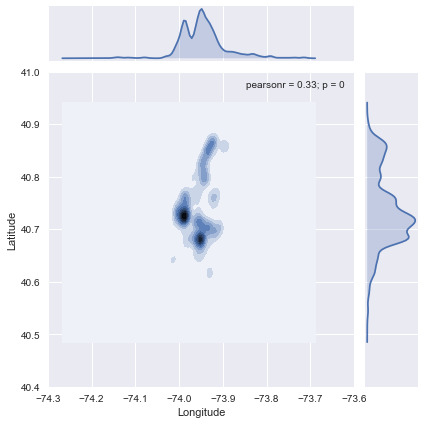

In [25]:
# making some more specific heatmaps for visualization (for powerpoint)
# did club, now try store street house park church
sns.jointplot(x="Longitude", y="Latitude", data=store, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

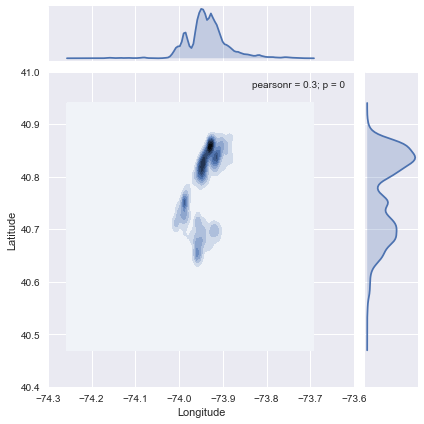

In [26]:
sns.jointplot(x="Longitude", y="Latitude", data=street, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

In [28]:
# house has too many entries
#sns.jointplot(x="Longitude", y="Latitude", data=house, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

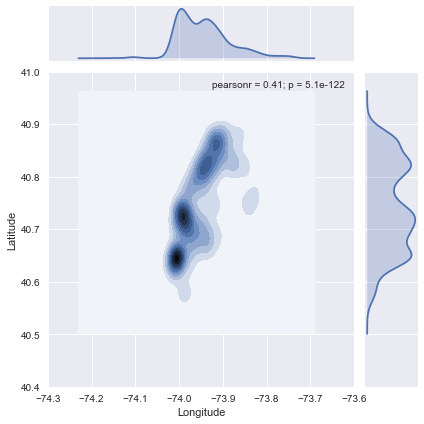

In [29]:
sns.jointplot(x="Longitude", y="Latitude", data=park, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

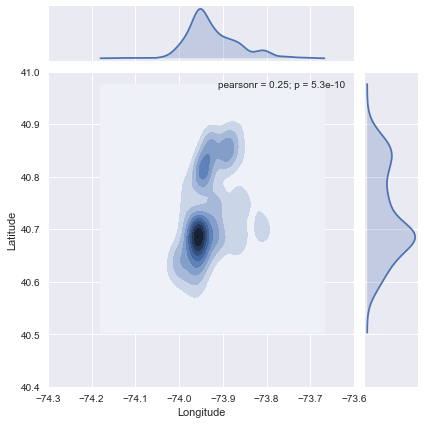

In [30]:
sns.jointplot(x="Longitude", y="Latitude", data=church, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))